In [1]:
import pandas as pd
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

In [2]:
df = pd.read_json('features.json')

In [3]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,track_href,analysis_url,duration_ms,time_signature,artist_pop,artist,genres,track_pop,song_name,release_date
0,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,...,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,75,Kesha,dance_pop pop post-teen_pop,80,TiK ToK,2010-01-01
1,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,...,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,https://api.spotify.com/v1/audio-analysis/11EX...,277573,4,67,Lady A,contemporary_country country country_dawn coun...,70,Need You Now,2010-01-01
2,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,...,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,https://api.spotify.com/v1/audio-analysis/4HlF...,216773,4,71,Train,dance_pop neo_mellow pop pop_rock,81,"Hey, Soul Sister",2010-12-01
3,0.791,0.754,0,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,...,https://api.spotify.com/v1/tracks/6tS3XVuOyu10...,https://api.spotify.com/v1/audio-analysis/6tS3...,234653,4,83,Katy Perry,dance_pop pop,75,California Gurls,2012-03-12
4,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,...,https://api.spotify.com/v1/tracks/1bM50INir8vo...,https://api.spotify.com/v1/audio-analysis/1bM5...,269493,4,78,Usher,atl_hip_hop contemporary_r&b dance_pop pop r&b...,72,OMG (feat. will.i.am),2010-03-30


In [4]:
#changing release_date to just year only
df['year'] = pd.DatetimeIndex(df['release_date']).year
df0 = df.copy()

In [5]:
#move songname, popularity and release year ahead in the df
df.insert(0, 'song_name', df.pop('song_name'))
df.insert(1, 'artist', df.pop('artist'))
df.insert(2, 'year', df.pop('year'))
df.insert(3, 'track_pop', df.pop('track_pop'))

In [6]:
drop_columns = ['type', 'id', 'uri', 'track_href', 'analysis_url','release_date']
df.drop(drop_columns, axis = 1, inplace = True)
df.head()

,song_name,artist,year,track_pop,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_pop,genres
0,TiK ToK,Kesha,2010,80,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028,199693,4,75,dance_pop pop post-teen_pop
1,Need You Now,Lady A,2010,70,0.587,0.622,4,-5.535,1,0.0303,0.09270,0.000636,0.2000,0.231,107.943,277573,4,67,contemporary_country country country_dawn coun...
2,"Hey, Soul Sister",Train,2010,81,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,216773,4,71,dance_pop neo_mellow pop pop_rock
3,California Gurls,Katy Perry,2012,75,0.791,0.754,0,-3.729,1,0.0569,0.00446,0.000000,0.1630,0.425,125.014,234653,4,83,dance_pop pop
4,OMG (feat. will.i.am),Usher,2010,72,0.781,0.745,4,-5.810,0,0.0332,0.19800,0.000011,0.3600,0.326,129.998,269493,4,78,atl_hip_hop contemporary_r&b dance_pop pop r&b...


In [7]:
#string concatnation to list of genre
df['genres'] = df['genres'].apply(lambda x: x.split(" "))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         1000 non-null   object 
 1   artist            1000 non-null   object 
 2   year              1000 non-null   int64  
 3   track_pop         1000 non-null   int64  
 4   danceability      1000 non-null   float64
 5   energy            1000 non-null   float64
 6   key               1000 non-null   int64  
 7   loudness          1000 non-null   float64
 8   mode              1000 non-null   int64  
 9   speechiness       1000 non-null   float64
 10  acousticness      1000 non-null   float64
 11  instrumentalness  1000 non-null   float64
 12  liveness          1000 non-null   float64
 13  valence           1000 non-null   float64
 14  tempo             1000 non-null   float64
 15  duration_ms       1000 non-null   int64  
 16  time_signature    1000 non-null   int64  
 

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1000.0,2014.107000,2.954027,2008.0,2012.000000,2014.0000,2017.000000,2021.000
track_pop,1000.0,53.394000,29.605325,0.0,42.750000,66.0000,74.000000,92.000
danceability,1000.0,0.664602,0.135949,0.0,0.581000,0.6725,0.754000,0.970
energy,1000.0,0.679843,0.158631,0.0,0.581000,0.7020,0.802000,0.972
key,1000.0,5.388000,3.677633,0.0,2.000000,6.0000,9.000000,11.000
loudness,1000.0,-5.751874,3.105892,-60.0,-6.658750,-5.4035,-4.308250,-1.190
mode,1000.0,0.631000,0.482775,0.0,0.000000,1.0000,1.000000,1.000
speechiness,1000.0,0.101814,0.097905,0.0,0.040675,0.0588,0.119250,0.592
acousticness,1000.0,0.146832,0.190568,0.0,0.019700,0.0665,0.194750,0.978
instrumentalness,1000.0,0.003997,0.035880,0.0,0.000000,0.0000,0.000008,0.680


In [10]:
check = df.query('track_pop < 25')
check['track_pop'].value_counts().head()

0     166
1      23
2       9
7       3
10      3
Name: track_pop, dtype: int64

track_populartity is having so many outliers. We have to clean it with a simple method: replacing it with the mean of the dataset + artist popularity / 2

In [11]:
#replacing < 20 values with mean value
dfmean = df['track_pop'].mean()
df.loc[df['track_pop'] <25, 'track_pop'] = (dfmean + df['track_pop'] + df['artist_pop'])/2
print(df['track_pop'].mean())
df['track_pop'].value_counts()

67.98843100000002


77.000    38
72.000    38
68.000    38
74.000    37
71.000    31
          ..
33.000     1
56.697     1
56.197     1
30.000     1
74.697     1
Name: track_pop, Length: 106, dtype: int64

In [12]:
dup = df[df.duplicated(['song_name','artist'])]
alldup = df[df.duplicated(['song_name','artist'], keep = False)]
print(len(dup),len(alldup),"ratio",len(alldup)/len(dup))
dup.head(5)

93 186 ratio 2.0


,song_name,artist,year,track_pop,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_pop,genres
114,Just the Way You Are,Bruno Mars,2010,82.0,0.635,0.841,5,-5.379,1,0.0422,0.01340,0.000000,0.0622,0.424,109.021,220734,4,87,"[dance_pop, pop]"
134,If I Die Young,The Band Perry,2010,67.0,0.606,0.497,4,-6.611,1,0.0277,0.34800,0.000000,0.2750,0.362,130.739,222773,4,56,"[contemporary_country, country, country_dawn, ..."
139,Only Girl (In The World),Rihanna,2010,55.0,0.786,0.716,11,-4.253,0,0.0409,0.10200,0.000017,0.0557,0.595,125.921,235520,4,89,"[barbadian_pop, dance_pop, pop, urban_contempo..."
143,Dynamite,Taio Cruz,2010,64.0,0.754,0.804,4,-3.177,1,0.0853,0.00332,0.000000,0.0329,0.818,119.968,203867,4,68,"[dance_pop, edm, pop, pop_rap]"
151,Just A Dream,Nelly,2010,74.0,0.531,0.752,1,-6.161,1,0.0305,0.04210,0.000000,0.1200,0.103,89.917,237800,4,73,"[dance_pop, gangster_rap, hip_hop, pop_rap, so..."


We can conclude that there are 93 songs that appear in two charts. since the ratio is 2, there is no song that appear in three charts. 

## Top 30 artist that appeared in 2010-2020

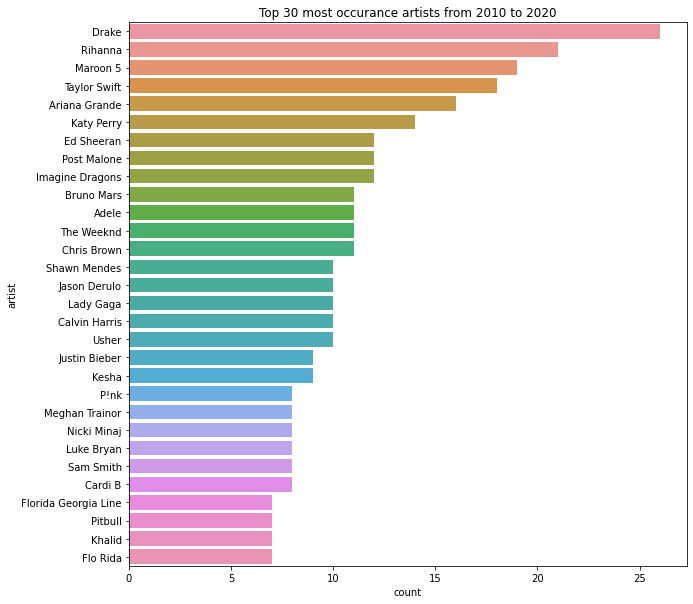

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(y='artist', data=df, order=df['artist'].value_counts().head(30).index).set_title('Top 30 most occurance artists from 2010 to 2020')
plt.show()

## Top 10 genre in 2010-2020

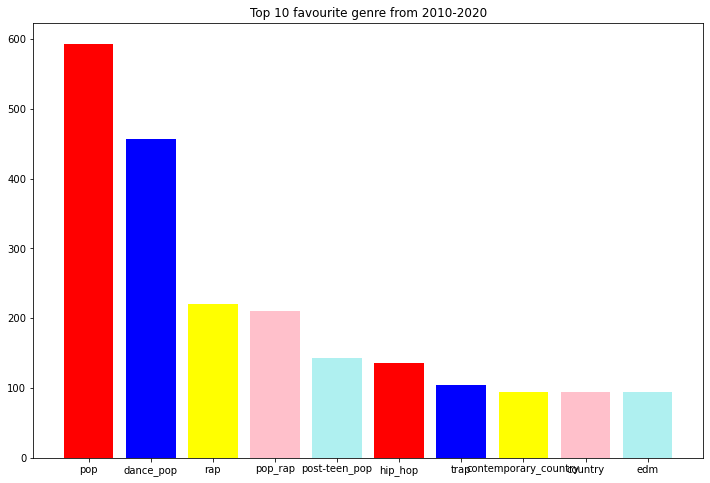

In [14]:
plt.figure(figsize=(12,8))
dfx = pd.Series(sum([item for item in df.genres], [])).value_counts()
dfx = dfx.to_frame()
dfx = dfx.reset_index(level=0)
dfx.columns = ['genre', 'count']
dfx = dfx.head(10)
plt.bar(dfx['genre'], dfx['count'], color = ['r','b','yellow','pink','#AFF0f0'])
plt.title("Top 10 favourite genre from 2010-2020")
plt.show()

## Top keys used

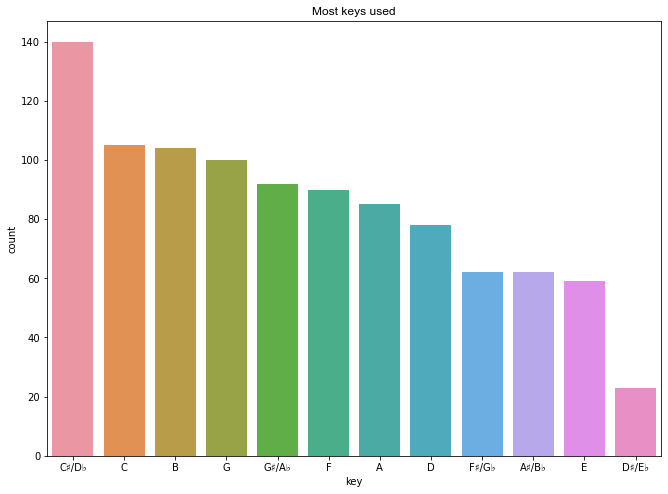

In [15]:
plt.rcParams.update({'font.family': 'DejaVu Sans'})
plt.figure(figsize=(11,8))
df['key'] = df['key'].replace(regex={0: 'C', 1 : 'C♯/D♭', 2: 'D', 3 : 'D♯/E♭', 4 : 'E', 5 : 'F', 6 : 'F♯/G♭', 7 : 'G', 8 : 'G♯/A♭', 9 : 'A', 10 : 'A♯/B♭', 11 : 'B' })
sns.countplot(x='key', data=df, order=df['key'].value_counts().index).set_title('Most keys used', fontname="Arial")
plt.show()

The most key used was C♯/D♭
The least used was D♯/E♭

## Time signature distribution

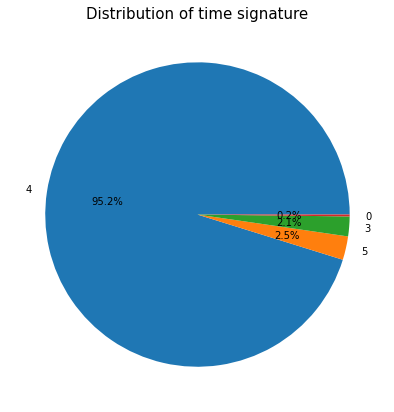

In [16]:
plt.figure(figsize=(9,7))
plt.pie(x = df['time_signature'].value_counts(), labels = df['time_signature'].unique(), autopct='%1.1f%%')
plt.title('Distribution of time signature', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of track data')

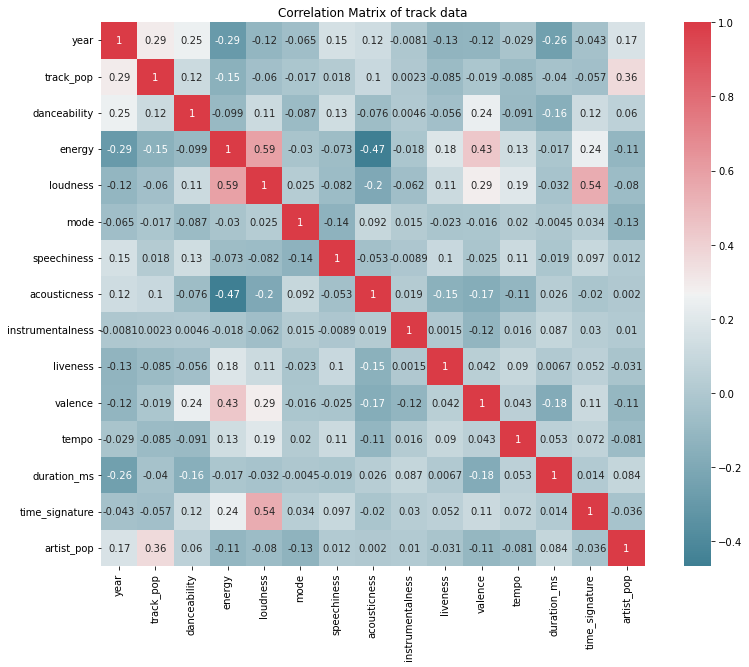

In [17]:
#getting correlation matrix
f, ax = plt.subplots(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot = True, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation Matrix of track data')

<AxesSubplot:xlabel='track_pop', ylabel='duration_ms'>

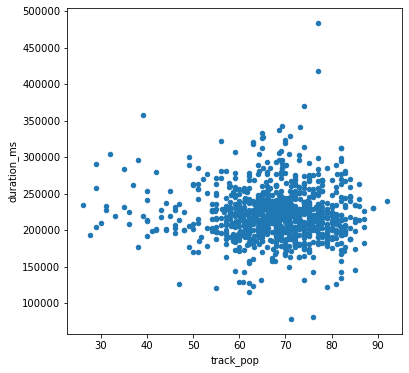

In [18]:
#scatterplot for duration and popularity
df.plot.scatter(x = 'track_pop', y = 'duration_ms', figsize = (6,6))

We can see that the duration of the song does not affect the track popularity

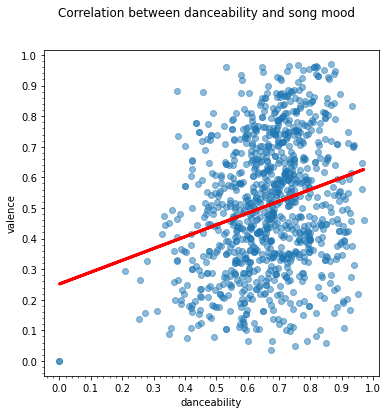

In [19]:
x = df["danceability"].values
y = df["valence"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and song mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()

C:\Users\PS42\AppData\Local\Temp\ipykernel_9676\4194001735.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\PS42\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


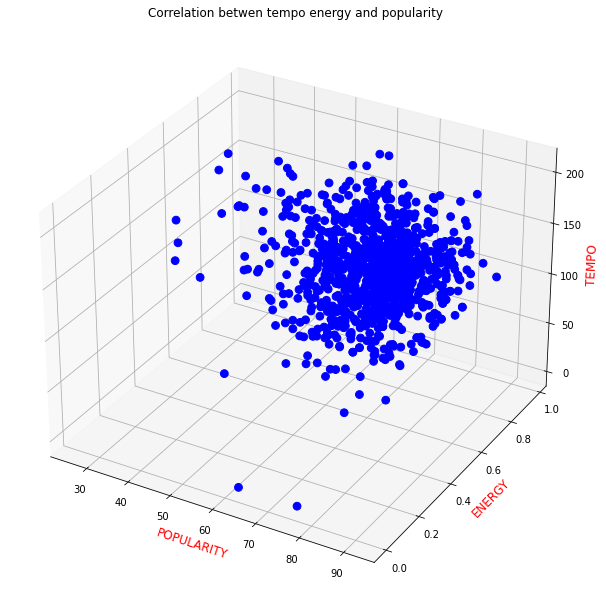

In [20]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("Correlation betwen tempo energy and popularity")
ax.set_xlabel("POPULARITY", fontsize = 12, color = "r")
ax.set_ylabel("ENERGY", fontsize = 12, color = "r")
ax.set_zlabel("TEMPO", fontsize = 12, color = "r")
ax.scatter3D(df['track_pop'], df['energy'], df['tempo'], alpha=1, s=60, color = "b")
plt.show()

In [21]:
dfx = sqldf('SELECT year, AVG(danceability), AVG(energy), AVG(valence), AVG(loudness), AVG(speechiness), AVG(acousticness), AVG(instrumentalness), AVG(liveness), AVG(tempo), AVG(duration_ms) FROM df0 GROUP BY year')
dfx = dfx.drop(12)
dfx

,year,AVG(danceability),AVG(energy),AVG(valence),AVG(loudness),AVG(speechiness),AVG(acousticness),AVG(instrumentalness),AVG(liveness),AVG(tempo),AVG(duration_ms)
0,2008,0.669333,0.769000,0.588667,-4.976667,0.058000,0.141833,0.000011,0.084900,115.305333,233542.333333
1,2009,0.584452,0.751738,0.524000,-4.866429,0.089981,0.113489,0.006970,0.224819,119.538095,239188.761905
2,2010,0.650457,0.751553,0.550277,-5.081362,0.101055,0.110281,0.001348,0.199374,117.028553,227529.648936
3,2011,0.628457,0.719867,0.530653,-5.202229,0.095656,0.137101,0.009131,0.174927,129.209133,232047.495238
4,2012,0.637286,0.741781,0.555410,-5.203114,0.079723,0.107860,0.000416,0.198694,121.124590,224127.276190
5,2013,0.635425,0.717517,0.522379,-5.437069,0.081467,0.119280,0.009594,0.162539,125.943069,235674.252874
6,2014,0.644943,0.647451,0.499510,-6.921419,0.077082,0.162115,0.000990,0.162885,119.321400,226776.542857
7,2015,0.661191,0.645484,0.496096,-6.070734,0.097851,0.168591,0.000828,0.183174,124.776011,216611.946809
8,2016,0.683793,0.637793,0.466730,-6.157839,0.114977,0.153656,0.004990,0.154955,122.461862,223153.252874
9,2017,0.716965,0.635469,0.503453,-6.067478,0.116363,0.166147,0.003568,0.147670,118.142850,216239.123894


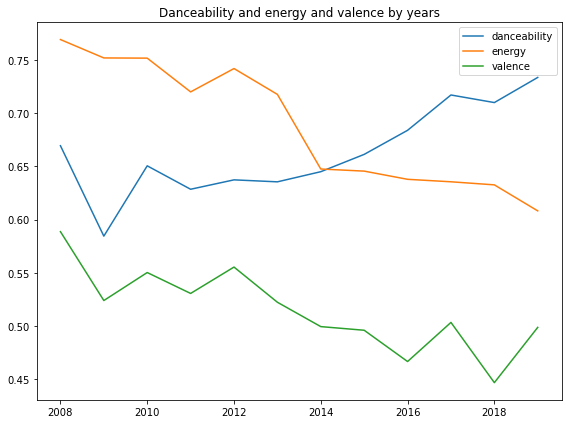

In [22]:
plt.figure(figsize=(8,6))
plt.title("Danceability and energy and valence by years")
plt.plot(dfx['year'], dfx['AVG(danceability)'], label = 'danceability')
plt.plot(dfx['year'], dfx['AVG(energy)'], label = 'energy')
plt.plot(dfx['year'], dfx['AVG(valence)'], label = 'valence')
plt.legend()
plt.show()

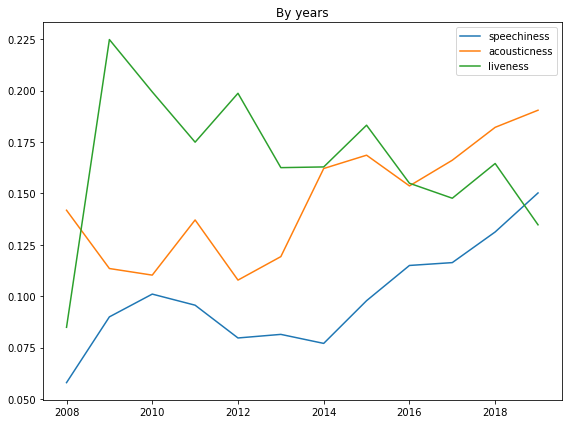

In [23]:
plt.figure(figsize=(8,6))
plt.title("By years")
plt.plot(dfx['year'], dfx['AVG(speechiness)'], label = 'speechiness')
plt.plot(dfx['year'], dfx['AVG(acousticness)'], label = 'acousticness')
plt.plot(dfx['year'], dfx['AVG(liveness)'], label = 'liveness')
plt.legend()
plt.show()